In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [48]:
df=pd.read_csv('/content/luxury_watch_sales_3000_rows.csv')

In [49]:
#Understanding The Data

In [50]:
df.head(5)

,watch_id,brand,model,sale_date,price_usd,material,movement,style,country,quantity
0,ffbdd167-40b3-48c3-8666-0ecfa0ded06b,Rolex,ROL-IHO308,2024/09/25,336161.30,NaN,Tourbillon,NaN,Heard Island and McDonald Islands,1
1,298e8e08-c0c2-4e1a-b505-428ebfd3fdea,Patek Philippe,PAT-NNK94,2023/01/29,195384.62,Gold,Quartz,Diver,Indonesia,5
2,4d116710-124c-4108-a044-d7e413434f4c,Rolex,ROL-CNV930,2025/06/14,24769.69,Platinum,Tourbillon,Chronograph,Madagascar,3
3,b283ca7b-22fa-4af6-80f7-7d8b70b084c0,Richard Mille,RIC-DSU82,2024/02/21,201990.88,Gold,Manual,Sport,Algeria,1
4,115e2c75-00af-495c-bd01-3f56501b487a,Vacheron Constantin,VAC-AEY692,2024/10/13,218640.50,NaN,Automatic,Sport,Honduras,3


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   watch_id   3000 non-null   object 
 1   brand      3000 non-null   object 
 2   model      3000 non-null   object 
 3   sale_date  3000 non-null   object 
 4   price_usd  3000 non-null   float64
 5   material   2260 non-null   object 
 6   movement   2326 non-null   object 
 7   style      2421 non-null   object 
 8   country    3000 non-null   object 
 9   quantity   3000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 234.5+ KB


In [52]:
df.shape

(3000, 10)

In [53]:
df.describe()

,price_usd,quantity
count,3000.000000,3000.000000
mean,251366.594073,2.985667
std,141931.906437,1.405034
min,5268.230000,1.000000
25%,129520.352500,2.000000
50%,248551.740000,3.000000
75%,375516.332500,4.000000
max,499960.520000,5.000000


In [54]:
df.isnull().sum()

,0
watch_id,0
brand,0
model,0
sale_date,0
price_usd,0
material,740
movement,674
style,579
country,0
quantity,0


In [55]:
#Data Cleaning

In [56]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [57]:
df['price_usd'] = df['price_usd'].astype(int)

In [58]:
df['material'].unique()

array([nan, 'Gold', 'Platinum', 'Steel', 'Titanium'], dtype=object)

In [59]:
df['material'] = df['material'].fillna(np.random.choice(['Gold', 'Platinum', 'Steel', 'Titanium']))

In [60]:
df['movement'] = df['movement'].fillna(
df.groupby('brand')['movement'].transform(lambda x: x.mode()[0])
)


In [61]:
df['style'].unique()

array([nan, 'Diver', 'Chronograph', 'Sport', 'Dress', 'Luxury'],
      dtype=object)

In [62]:
df['style'] = df['style'].fillna(np.random.choice(['Diver', 'Chronograph', 'Sport', 'Dress', 'Luxury']))

In [63]:
df.drop(['watch_id'],axis=1,inplace=True)

In [64]:
#Feature Engineering

In [65]:
df['total sales']=df['price_usd']*df['quantity']

In [66]:
df['year'] = df['sale_date'].dt.year

In [91]:
#Data Visualization

In [67]:
#Rolex Style-Wise Total Sales

In [68]:
rolex_df=df[df['brand']=='Rolex']

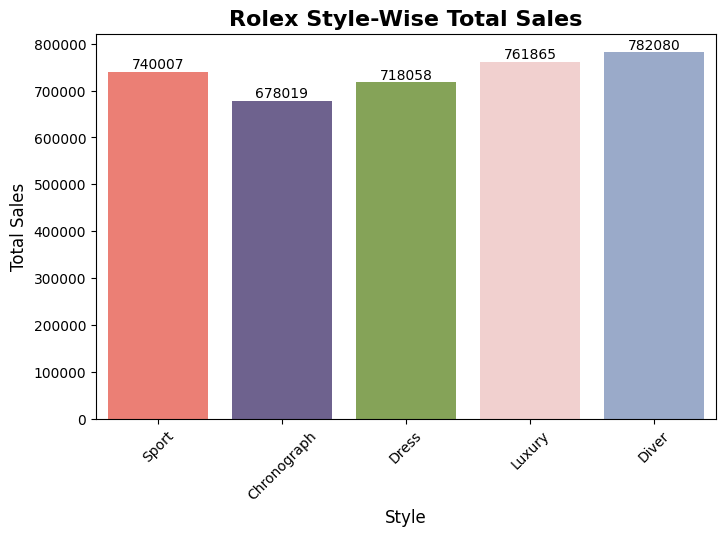

In [69]:
plt.figure(figsize=(8,5))
colors = [
    "#FF6F61",  # Coral
    "#6B5B95",  # Purple
    "#88B04B",  # Green
    "#F7CAC9",  # Pink
    "#92A8D1",  # Light Blue
]
ax = sns.barplot(data=rolex_df, x='style', y='total sales',errorbar=None,  palette=colors, hue='style',legend=False)
plt.xlabel('Style',fontsize=12)
plt.ylabel('Total Sales',fontsize=12)
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Rolex Style-Wise Total Sales', fontsize=16, fontweight='bold')
plt.show()

In [70]:
#Total Sales by Sale Date (All Brands)

In [71]:
grp = df.groupby('brand', as_index=False)['total sales'].sum().sort_values('total sales', ascending=False)


In [72]:
grp

,brand,total sales
0,Audemars Piguet,488624159
2,Richard Mille,455441233
4,Vacheron Constantin,446608136
3,Rolex,437448536
1,Patek Philippe,415843417


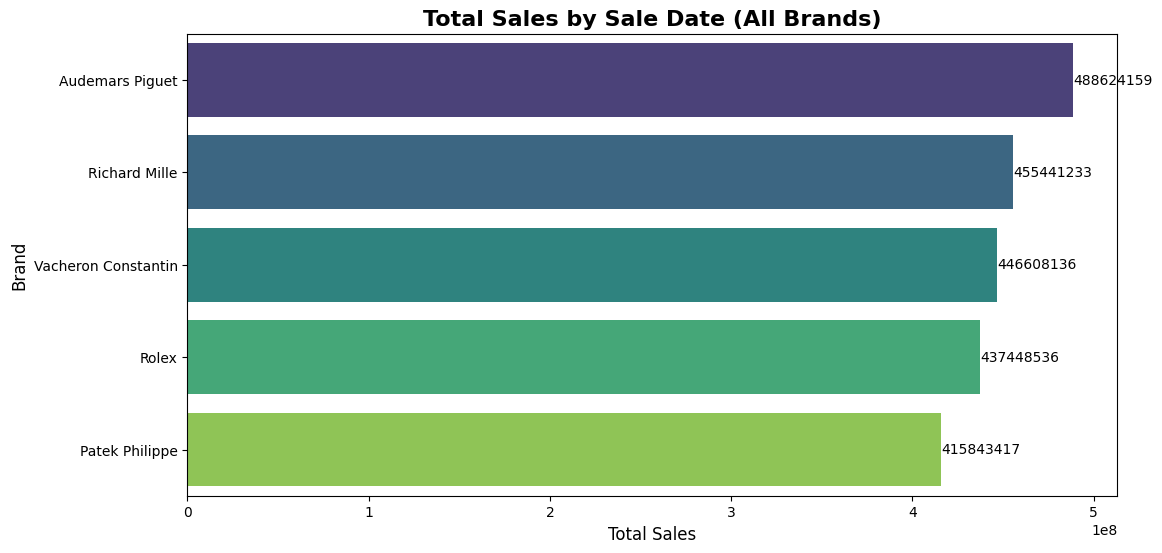

In [73]:
plt.figure(figsize=(12,6))
ax = sns.barplot( data=grp, y='brand',x='total sales', orient='h',errorbar=None, palette='viridis', hue='brand', legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
plt.xlabel('Total Sales',fontsize=12)
plt.ylabel('Brand',fontsize=12)
plt.title('Total Sales by Sale Date (All Brands)', fontsize=16, fontweight='bold')
plt.show()

In [74]:
#Richard Mille Total Sales by Year

In [75]:
RichardMille_df = df[df['brand'] == 'Richard Mille'].copy()


In [76]:
yearly_sales = RichardMille_df.groupby('year')['total sales'].sum().reset_index()

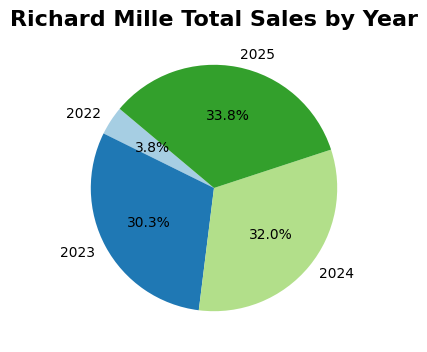

In [77]:
plt.figure(figsize=(4,4))
plt.pie(
    yearly_sales['total sales'],
    labels=yearly_sales['year'].astype(str),
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Richard Mille Total Sales by Year", fontsize=16, fontweight='bold')
plt.show()

In [78]:
#Patek Philippe Total Sales by material

In [79]:
Patek_Philippe_df = df[df['brand'] == 'Patek Philippe'].copy()

In [80]:
material_sales = Patek_Philippe_df.groupby('material')['total sales'].sum().reset_index()

In [81]:
a=px.pie(material_sales, values='total sales', names='material', title='Patek Philippe Total Sales by material',hole=0.3,)
a.update_traces(textinfo='percent+label')
a.show()

In [82]:
#Audemars Piguet – Unique Model Price Distribution with KDE

In [83]:
ap = df[df['brand'] == "Audemars Piguet"]

In [84]:
#Keep only unique models
ap_unique = ap.drop_duplicates(subset=['model'])

In [85]:
#Extract unique model prices
prices = ap_unique['price_usd']

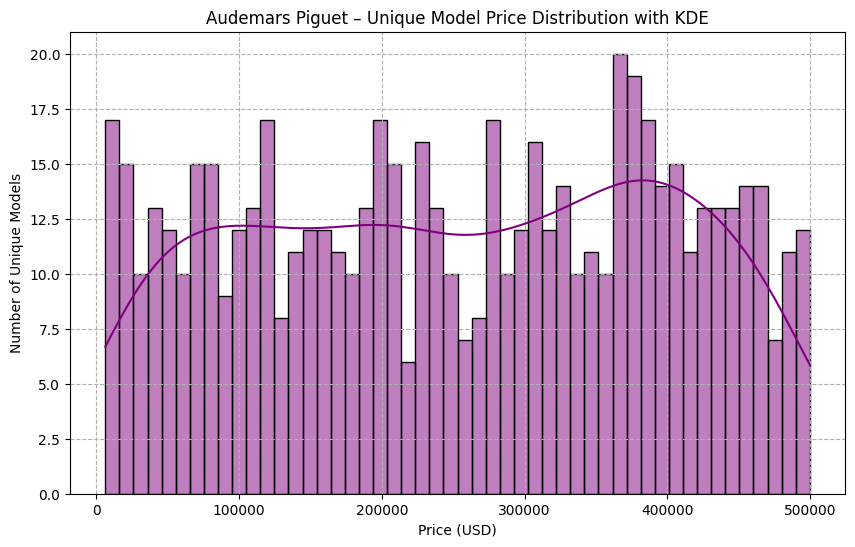

In [86]:
plt.figure(figsize=(10,6))
sns.histplot(prices, bins=50, kde=True, color='purple', edgecolor='black')
plt.title("Audemars Piguet – Unique Model Price Distribution with KDE")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Unique Models")
plt.grid(linestyle='--')
plt.show()

In [87]:
#Vacheron Constantin Sales by Year

In [88]:
vc_df = df[df['brand'] == "Vacheron Constantin"]

In [89]:
# Aggregate total sales per year
sales_by_year = vc_df.groupby('year')['price_usd'].sum().reset_index()

In [90]:
fig = px.bar(
   sales_by_year,
    x='year',
    y='price_usd',
    title='Vacheron Constantin Sales by Year',
    text='price_usd',
    color='price_usd',
    color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

In [94]:
#Conclusion
#Luxury watch sales vary clearly by style, brand, and material, with top brands dominating overall performance.
#Price and year-wise trends show strong demand and consistent high value across premium watchmakers.



